In [1]:
!pip install pandas
!pip install sklearn
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [4]:
data = pd.read_csv("Titanic.csv")
data = data[data['age'].notna()]


In [5]:
le = preprocessing.LabelEncoder()

In [6]:
data['pclass'] = le.fit_transform(data['pclass'])
data['sex'] = le.fit_transform(data['sex'])

In [7]:
features = ['pclass', 'sex', 'age', 'sibsp']

In [8]:
y = data['survived']
x = data[features]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [10]:
decision_tree = tree.DecisionTreeClassifier()
dt = decision_tree.fit(x_train, y_train)

prediction = decision_tree.predict(x_test)

In [11]:
print(metrics.accuracy_score(y_test, prediction))

0.7285714285714285


In [12]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, prediction)

array([[107,  17],
       [ 40,  46]])

In [13]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.73      0.86      0.79       124\n           1       0.73      0.53      0.62        86\n\n    accuracy                           0.73       210\n   macro avg       0.73      0.70      0.70       210\nweighted avg       0.73      0.73      0.72       210\n'

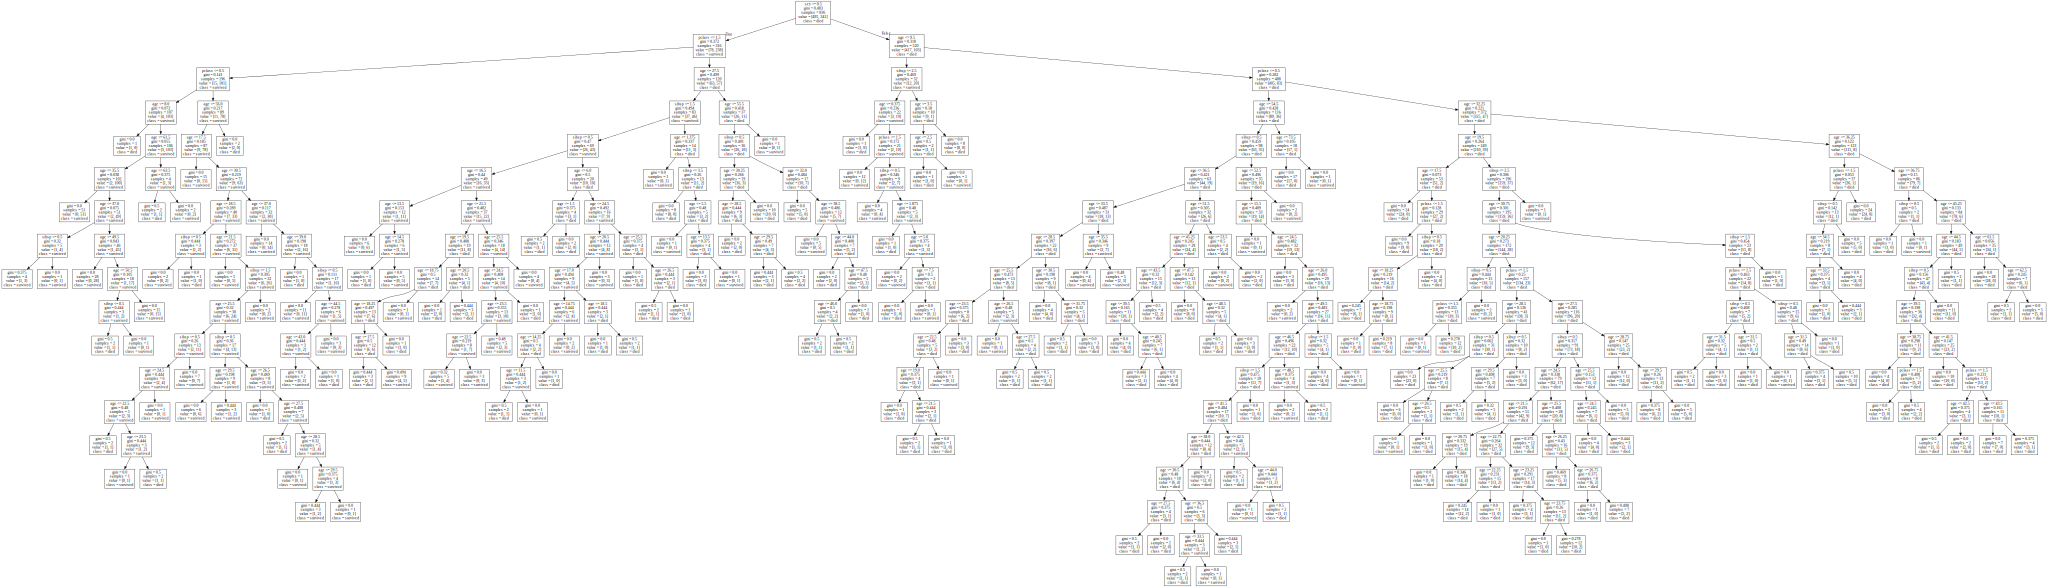

In [14]:
import graphviz
tree_visualized = tree.export_graphviz(decision_tree, feature_names=features, class_names=['died', 'survived'])
tree_visualized = graphviz.Source(tree_visualized, format="png")
tree_visualized

In [16]:
# OPTIMIZING USING GRIDSEARCH
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,10)}
new_tree = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
new_tree.fit(X=x_train, y=y_train)
new_tree_model = new_tree.best_estimator_
print(new_tree.best_score_, new_tree.best_params_)


0.8109851725121185 {'max_depth': 4}


In [20]:
# CROSS VALIDATTION
x_traincv,x_testcv,y_traincv,y_testcv = train_test_split(x,y,test_size=0.2)

In [23]:
from sklearn.model_selection import cross_val_score
depth = []
all_scores = []
misclassifications = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform k-fold cross validation (7)
    scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
    all_scores.append(scores.mean())
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    misses = confusion_matrix(y_test, prediction)
    misclassifications.append(confusion_matrix(y_test, prediction)[0][1] + confusion_matrix(y_test, prediction)[1][1])

print(misclassifications)

[68, 64, 59, 66, 67, 62, 67, 64, 68, 67, 68, 67, 62, 67, 63, 67, 63]


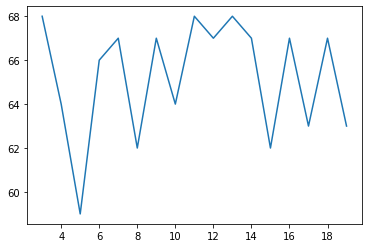

In [26]:
import matplotlib.pyplot as plt

plt.plot(range(3, 20), misclassifications)
# plt.plot(all_scores, range(3, 20))

In [33]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(x_train, y_train)
y_pred1 = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred1)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))


[[113  11]
 [ 34  52]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       124
           1       0.83      0.60      0.70        86

    accuracy                           0.79       210
   macro avg       0.80      0.76      0.77       210
weighted avg       0.79      0.79      0.78       210



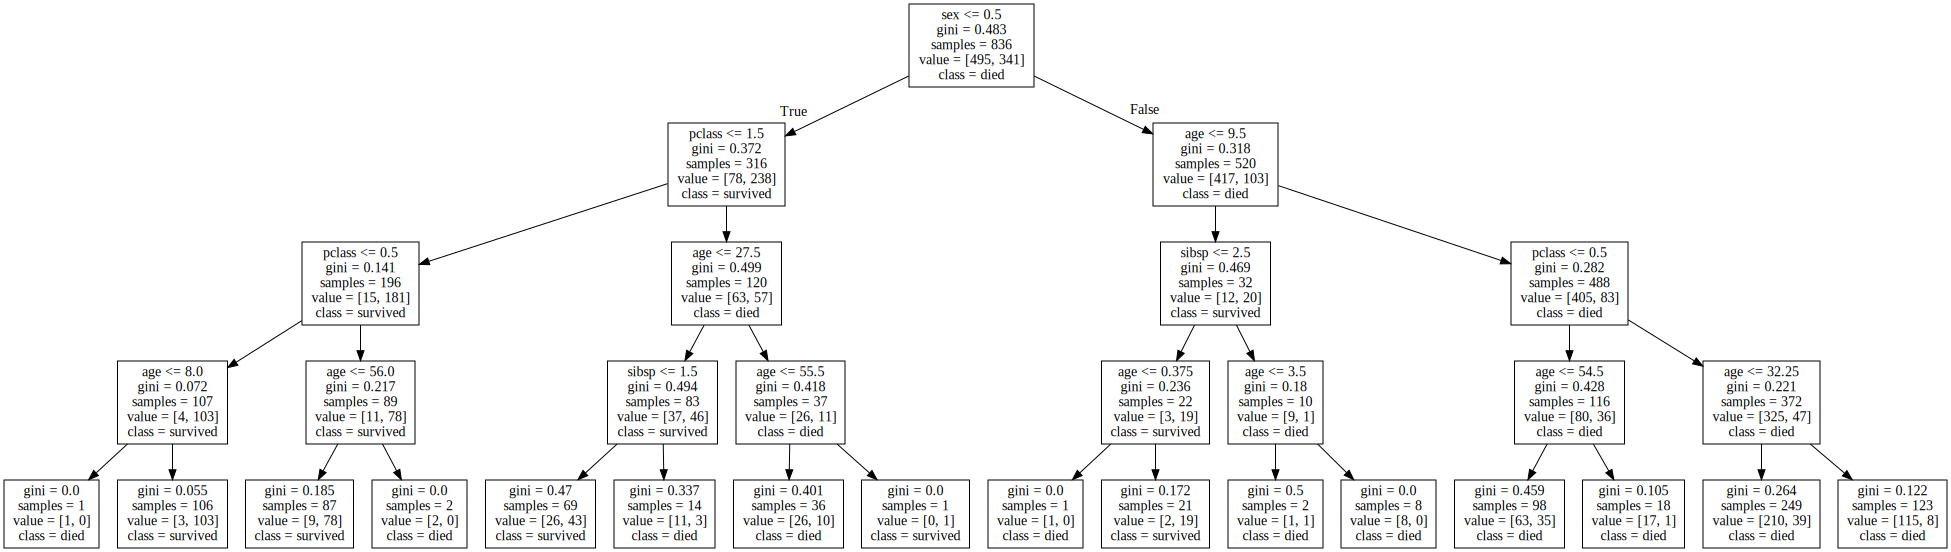

In [37]:
tree_visualized = tree.export_graphviz(clf, feature_names=features, class_names=['died', 'survived'])
tree_visualized = graphviz.Source(tree_visualized, format="png")
tree_visualized